### **Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce**


Domain : E-Commerce and Retail Analytics

Contribution - Individual

### Problem Type:

Unsupervised Machine Learning – Clustering

Collaborative Filtering – Recommendation System


## **Project Summary**

This project focuses on leveraging transactional data from an online retail business to derive actionable insights through customer segmentation and personalized product recommendation. The global e-commerce industry generates vast amounts of purchase data daily, and analyzing this data is critical to understanding customer behavior, optimizing marketing strategies, and enhancing the customer experience. The project begins with an extensive data preprocessing phase, including the removal of missing values, invalid transactions (such as negative quantities or zero-priced items), duplicate entries, and irrelevant records. Feature engineering techniques are applied to create meaningful variables such as TotalPrice (computed as Quantity × Unit Price), and categorical variables like Country are encoded using label encoding. Normalization is performed using MinMaxScaler to ensure consistent data scaling for further analysis.

The core analytical approach involves RFM (Recency, Frequency, Monetary) analysis to measure customer engagement and value. Recency captures the number of days since a customer's last purchase, Frequency quantifies the number of unique purchase instances, and Monetary represents the total amount spent. Outliers in RFM data are handled using Z-score filtering to enhance the robustness of clustering algorithms. To reduce dimensionality and visualize customer behavior, Principal Component Analysis (PCA) is applied, followed by KMeans clustering to identify natural customer segments. These clusters are then interpreted into business-relevant categories such as High-Value Customers, Low-Value Customers, New Customers, and At-Risk Customers, each accompanied by strategic action plans for marketing interventions.

In addition to segmentation, the project implements a collaborative filtering-based product recommendation system. This system analyzes user-item interaction patterns to suggest relevant products to users based on the behavior of similar customers. The recommendation engine aims to increase product discoverability, drive repeated purchases, and enhance user satisfaction. Throughout the project, comprehensive visualizations including histograms, boxplots, scatter plots, and segment distribution charts provide meaningful insight into customer purchasing patterns. Overall, this project demonstrates the power of combining data preprocessing, RFM modeling, unsupervised learning, and recommendation algorithms to support data-driven decision-making in the e-commerce domain. The final outcomes enable targeted marketing, improved customer retention, and personalized product offerings, ultimately contributing to business growth and operational efficiency.

### **GitHub Link -**

## **Problem Statement**

The exponential growth of the global e-commerce sector has led to the generation of massive volumes of transactional data on a daily basis. This data, when analyzed effectively, provides critical insights into customer purchasing behavior, preferences, and engagement patterns. Leveraging such insights is fundamental for driving strategic decisions related to customer segmentation, personalization, and product recommendation.

This project focuses on the comprehensive analysis of historical transaction data sourced from an online retail business. The primary objectives include:



*   Performing exploratory data analysis (EDA) and data preprocessing to cleanse and standardize the dataset

*   Implementing RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchasing activity and financial value to the business.
*   Applying unsupervised machine learning techniques such as KMeans clustering for behavioral segmentation of customers.


*   Designing a collaborative filtering-based recommendation system that suggests relevant products to users by identifying patterns from similar users’ purchase histories.



The end goal is to enhance the overall customer experience, increase retention and loyalty, and drive business growth through data-driven personalization strategies.

### Starting with the code !!!

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/Data/online_retail_data.csv"

In [6]:
# Read the csv file
df = pd.read_csv(path)

# Making a copy of the dataframe
df_clean = df.copy()

### Dataset First View



In [7]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print("Number of Rows present in the Dataset:",df_clean.shape[0])
print("Number of Columns present in the Dataset:",df_clean.shape[1])

Number of Rows present in the Dataset: 541909
Number of Columns present in the Dataset: 8


### Dataset Information

In [9]:
# Dataset Info
print(" Dataset Information:  \n")
df_clean.info()

 Dataset Information:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print("Number of Duplicate Values:", df_clean.duplicated().sum())

Number of Duplicate Values: 5268


### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print("Missing Values in each Columns of the Dataset: \n")
print(df_clean.isnull().sum())

Missing Values in each Columns of the Dataset: 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Visualization of Missing Values in the dataset

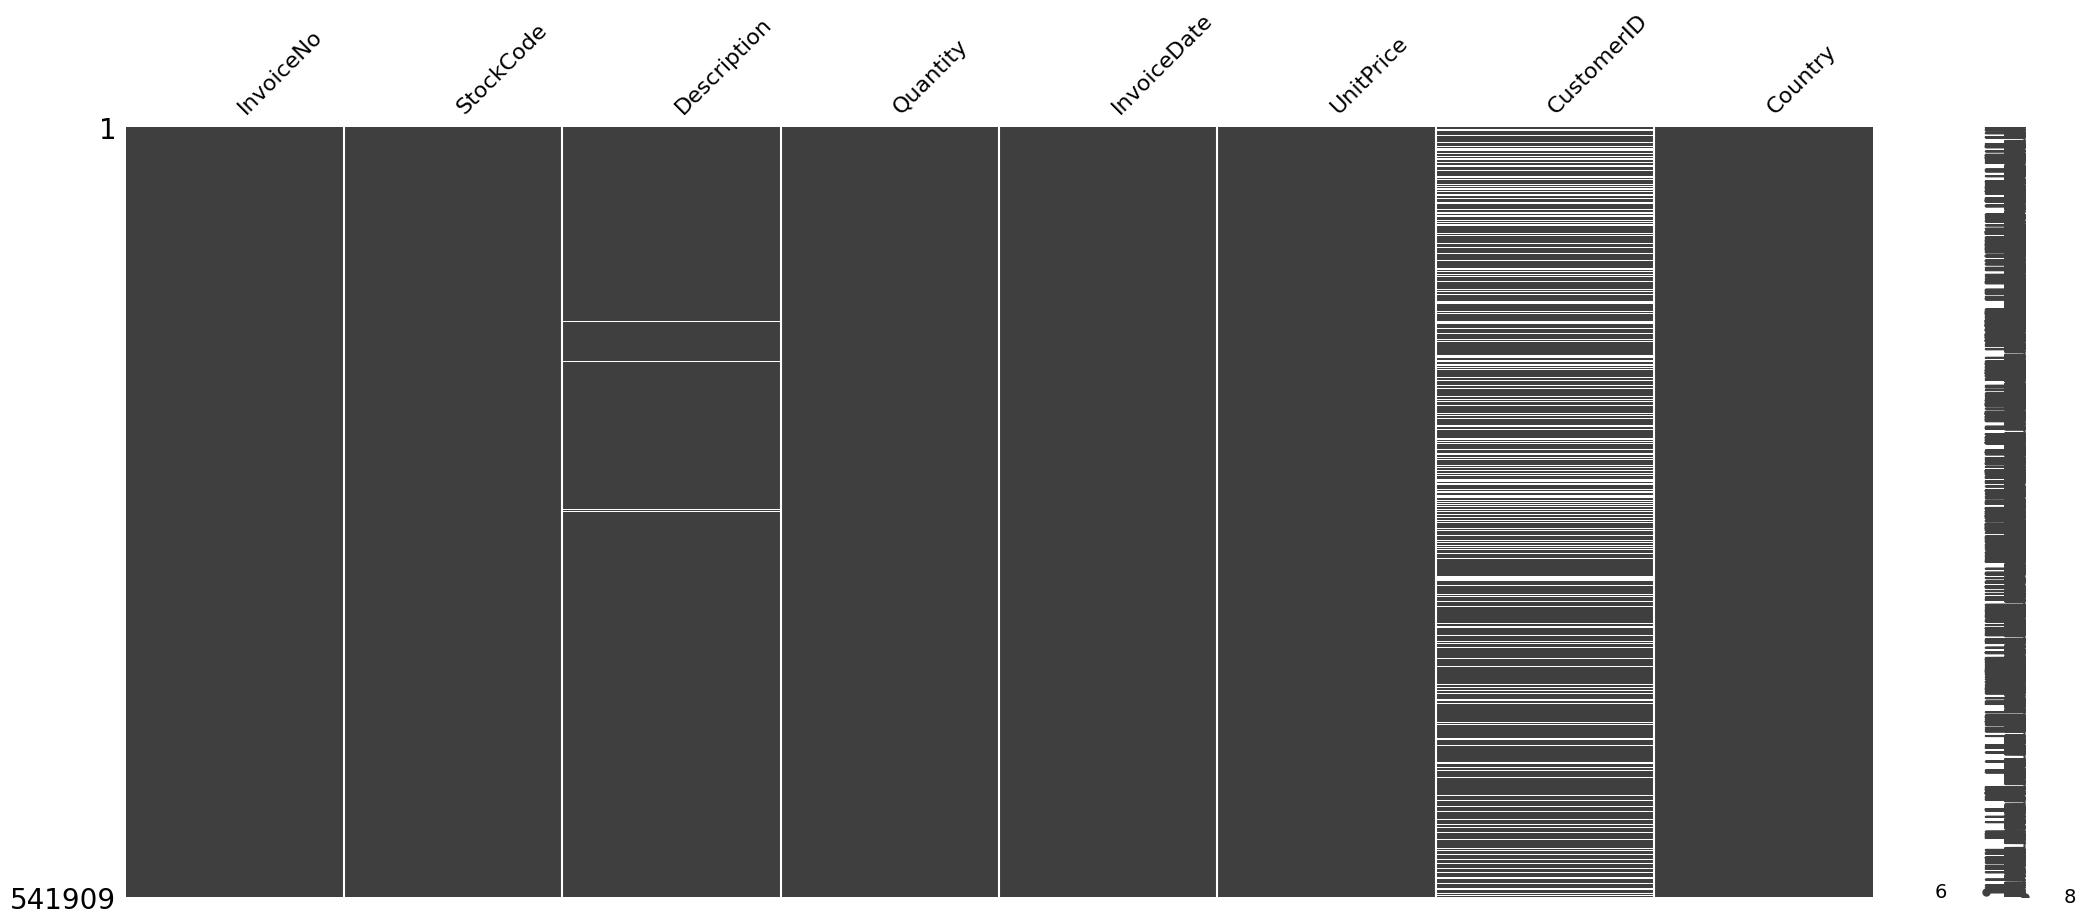

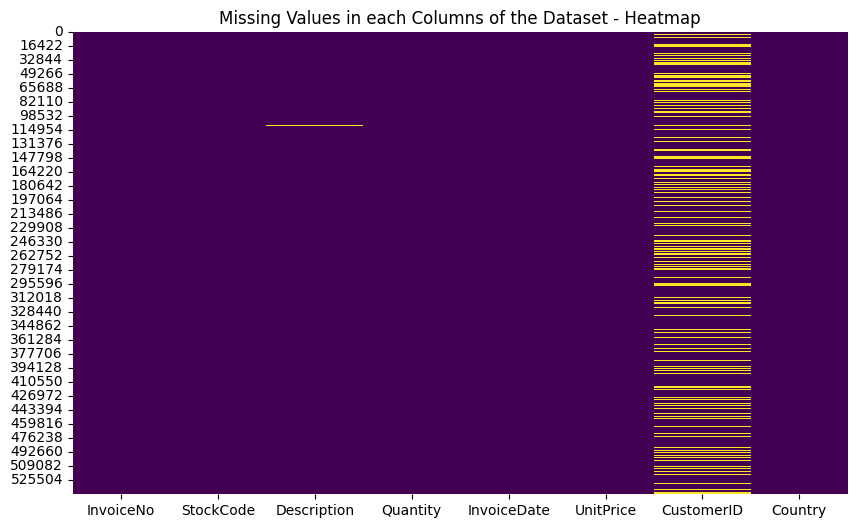

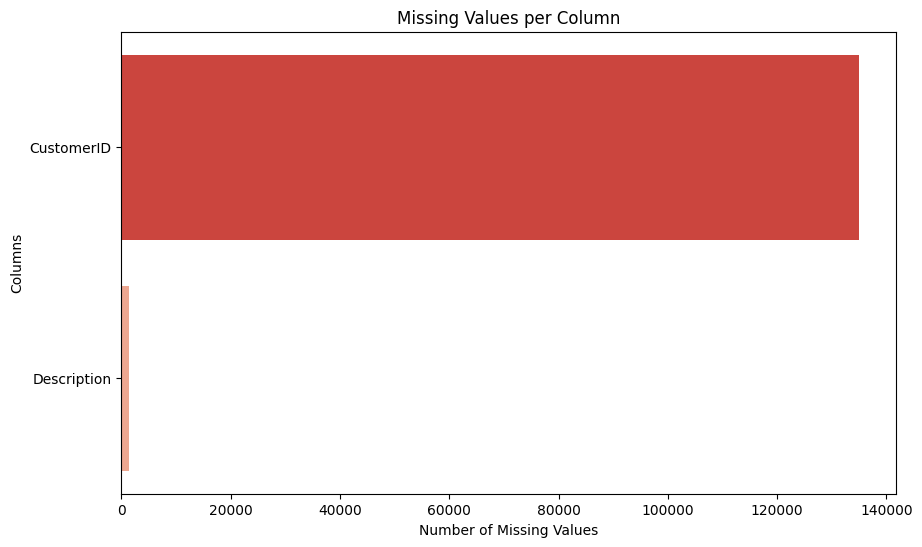

In [12]:
# Visualizing the missing values
# Missingno Matrix
import missingno as msno
msno.matrix(df_clean)
plt.show()

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in each Columns of the Dataset - Heatmap')
plt.show()

# Bar Chat for a more clear Visualization of the missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column')
plt.show()

What did you know about your dataset?

The dataset contains transactional data from an online retail store.

Each row represents a single product purchase by a customer.

Key columns include:

**InvoiceNo** – unique invoice ID

**StockCode** – product code

**Description** – product name

**Quantity** – number of items purchased

**InvoiceDate** – when the transaction happened

**UnitPrice** – price per item

**CustomerID** – unique customer ID

**Country** – country of the customer

### Understanding Your Variables

In [13]:
# Dataset Columns
print("The columns present in the Dataset: \n")
df_clean.columns.tolist()


The columns present in the Dataset: 



['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [14]:
# Data types of the columns of the Dataset
print("Data types of the columns of the dataset: \n")
df_clean.dtypes

Data types of the columns of the dataset: 



,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


### Description of the Dataset

In [15]:
# Dataset Describe
print("Description of the Dataset: \n")
df_clean.describe()

Description of the Dataset: 



,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Unique Values for Each Variable

In [16]:
# Check Unique Values for each variable.
print("Unique Values in each Columns of the Dataset: \n")
df_clean.nunique()

Unique Values in each Columns of the Dataset: 



,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


Data Wrangling - Data Cleaning

In [17]:
# Drop rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

# Remove entries with non-positive price
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Display shape after cleaning
print(f"Shape after cleaning: {df_clean.shape}")

df_clean.head()
df_clean.columns.tolist()

Shape after cleaning: (392692, 8)


['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

What all manipulations have you done and insights you found?

**Removal of Incomplete Records**


*   Dropped rows where the CustomerID is missing.
*  **Reason**: Since CustomerID is essential for customer-level analysis (especially RFM and segmentation), rows without it cannot be used for personalized insights.


**Elimination of Canceled Transactions**


*   Filtered out transactions where Quantity <= 0.
*   **Reason**: Negative or zero quantity often indicates returns or cancellations, which are not relevant when calculating customer purchase behavior (e.g., total spend, frequency).


**Exclusion of Invalid Pricing**


*   Removed rows with non-positive (<= 0) UnitPrice
*   **Reason**: Ensures that all transactions involve valid sales. Prices less than or equal to zero may indicate errors or promotional artifacts.

**Datetime Conversion**


*   Converted InvoiceDate column to a datetime object.
*   **Reason**: Enables time-based analysis, such as calculating recency, trend analysis, and time series segmentation.

**Duplicate Removal**


*   Dropped duplicated records from the dataset.
*   **Reason**: To ensure data integrity and avoid overestimation of customer activity or revenue.












### **Exploratory Data Analysis (EDA) **

### 1. Univariate Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

Plot 1: Top 10 Countries by Transaction Count

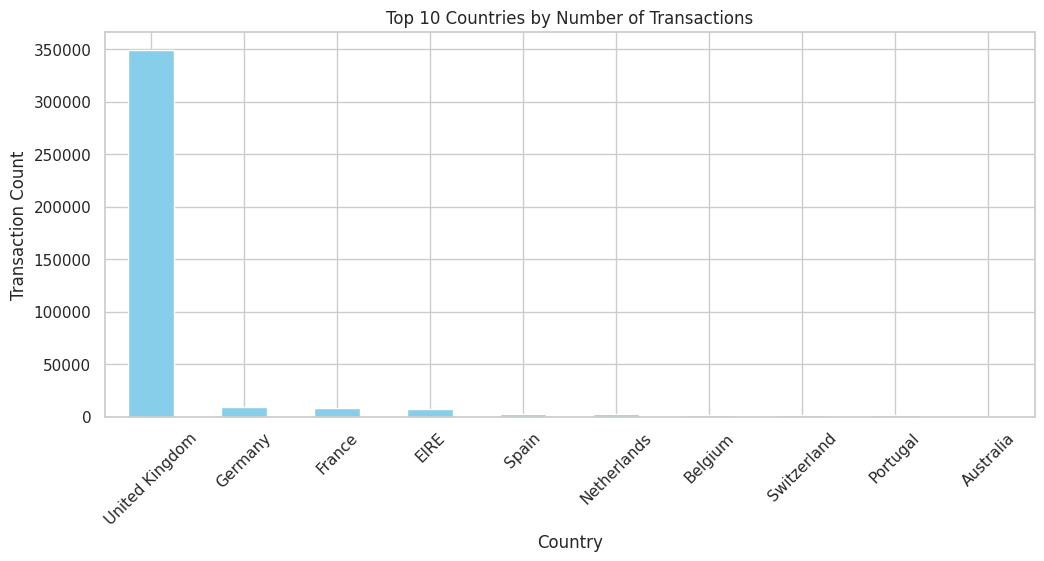

In [19]:
plt.figure(figsize=(12,5))
df_clean['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Transactions')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

We chose a bar chart because it is the best way to:

1. Clearly compare values across different countries

2. Easily show which countries have more transactions

3. Make patterns and outliers visually obvious

2. What is/are the insight(s) found from the chart?

The United Kingdom dominates with the highest number of transactions — far more than any other country.

Other countries like Germany, France, and EIRE have similar, but much smaller transaction counts.

There’s a very high geographic imbalance in sales.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Focus marketing, promotions, and product variety in the UK, since it’s the most active market.

Use insights to plan inventory, shipping, and regional strategies.

Plot 2: Quantity Distribution

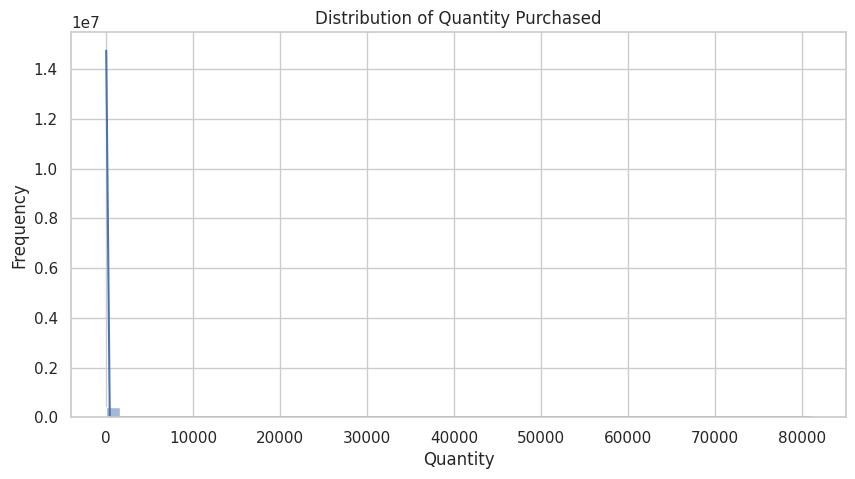

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


1. Why did you pick the specific chart?

We used a histogram because it's ideal for showing the distribution of a single numeric variable — in this case, how frequently different quantities were purchased.
It helps detect skewness, outliers, and data spread.

2. What is/are the insight(s) found from the chart?

Most quantities purchased are low, clustered near the left (e.g., 1 to 10).

There are extreme outliers (quantities up to 80,000), but they are very rare.

The data is heavily right-skewed, meaning large purchases are uncommon.



3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Inventory and stock planning should prioritize small to medium quantity products, as they represent the majority of purchases.

Helps avoid overstocking rarely bought items.

Plot 3: Unit Price Distribution

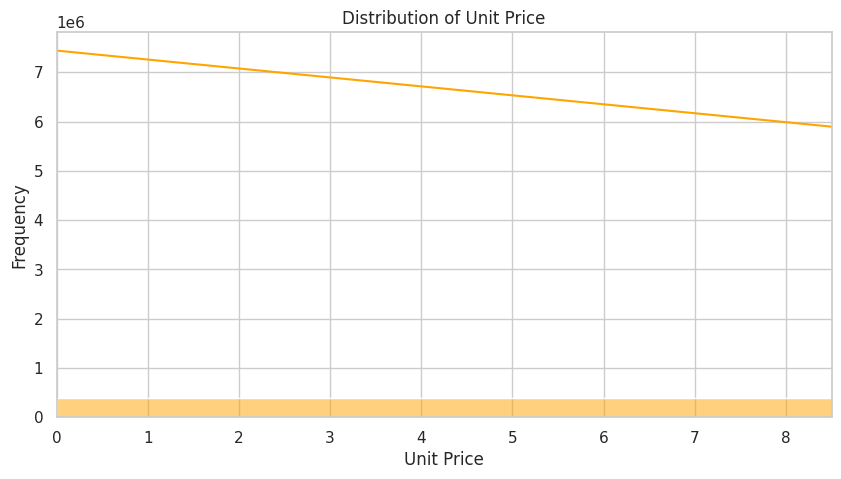

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['UnitPrice'], bins=50, kde=True, color='orange')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, df_clean['UnitPrice'].quantile(0.95))  # Remove extreme outliers
plt.show()


1. Why did you pick the specific chart?

We used a histogram with KDE (Kernel Density Estimation) to:

1. Understand how product unit prices are distributed

2. Easily detect skewness and outliers

3. Focus only on meaningful data by limiting the x-axis to the 95th percentile

2. What is/are the insight(s) found from the chart?

Most products are priced very low, between 0 and 2 units (e.g., £).

The distribution is right-skewed, meaning a few high-priced items exist.

The long tail of the curve suggests that expensive items are rare.



3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps optimize pricing strategy by identifying popular price ranges.

Focus promotions or bundles on low-cost, high-demand products.

Enables better inventory forecasting.

### 2. Bivariate Analysis

Plot 4: Top 10 Selling Products

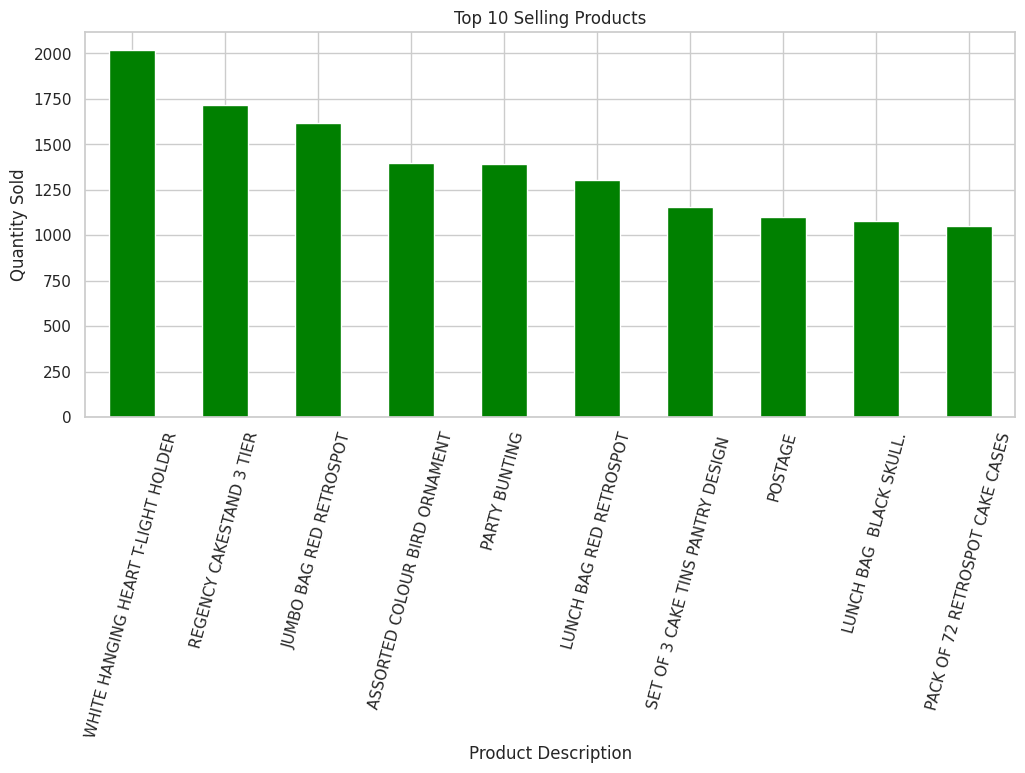

In [22]:
plt.figure(figsize=(12,5))
df_clean['Description'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=75)
plt.show()

1. Why did you pick the specific chart?

We chose a bar chart because it is ideal for:

1. Comparing sales volumes (quantities sold) across different products

2. Highlighting which items are the most popular

3. Quickly spotting best-sellers for inventory or marketing decisions



2. What is/are the insight(s) found from the chart?

The top-selling product is "WHITE HANGING HEART T-LIGHT HOLDER"

Decorative and gifting items (like cake stands, ornaments, bags) dominate the top 10

These products seem to have consistently high demand

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Focus marketing and promotions on these high-demand products

Ensure stock availability to avoid lost sales

Helps identify trending product categories

Plot 5: Monthly Purchase Trends

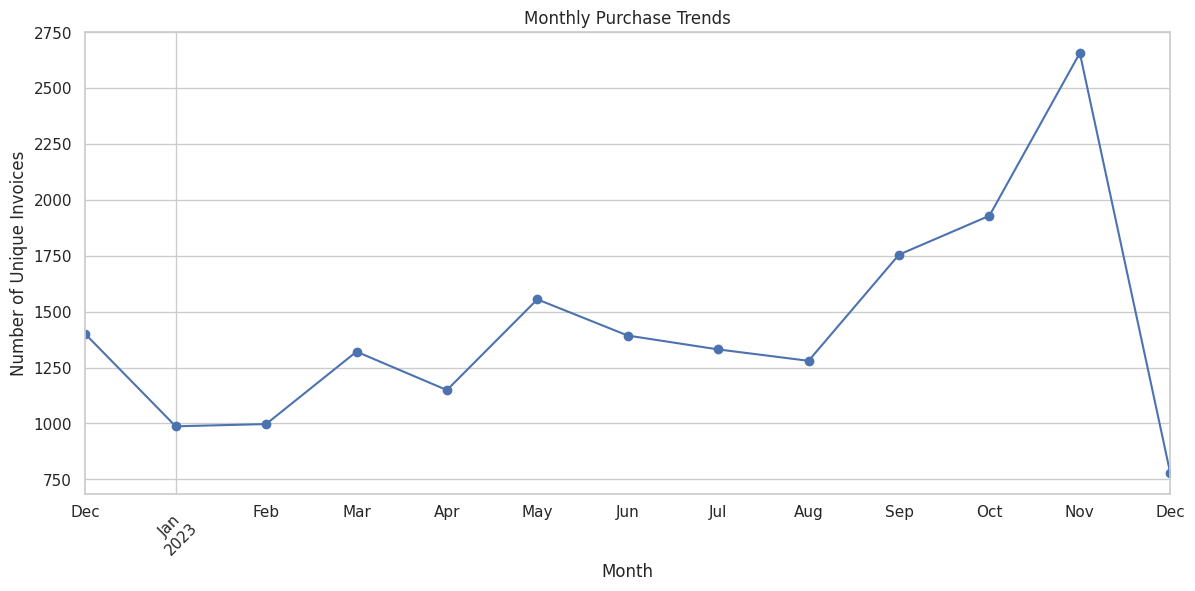

In [23]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('Month')['InvoiceNo'].nunique()

plt.figure(figsize=(14,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Purchase Trends')
plt.ylabel('Number of Unique Invoices')
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

We used a line chart because it effectively shows trends over time. Here, we’re analyzing how the number of unique invoices (transactions) changes month by month, which is ideal for line plots.

2. What is/are the insight(s) found from the chart?

November shows a sharp peak, indicating the highest number of purchases — likely due to seasonal promotions or holiday sales.

December drops suddenly, likely because data cuts off mid-month or after major holidays.

Summer months (June–August) have lower activity, indicating slower sales periods.

There's a clear upward trend from September to November.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

The sales spike in November can guide targeted marketing or promotions in that month to maximize revenue.

Identifying slow months (e.g., summer) allows the business to run special discounts or loyalty programs during that time to boost sales.

Plot 6: Monetary Value per Transaction

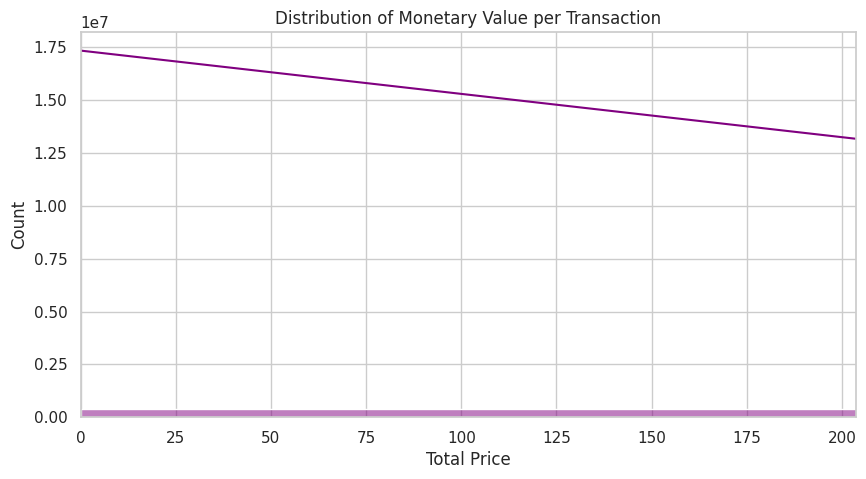

In [24]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

plt.figure(figsize=(10,5))
sns.histplot(df_clean['TotalPrice'], bins=50, kde=True, color='purple')
plt.title('Distribution of Monetary Value per Transaction')
plt.xlabel('Total Price')
plt.xlim(0, df_clean['TotalPrice'].quantile(0.99))
plt.show()


1. Why did you pick the specific chart?

A histogram is ideal for showing the distribution of a single continuous variable — here, the TotalPrice per transaction. It helps us understand how transaction values are spread across the dataset and identify outliers or skewness.

2. What is/are the insight(s) found from the chart?

The distribution is right-skewed: most transactions have low to moderate value, while high-value transactions are rare.

A large number of transactions fall below a certain value (below the 99th percentile), indicating a typical spending range.

The kde line (smoothed curve) reinforces that most customers buy in small amounts.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify target segments (e.g., upsell to low-spenders).

Businesses can design premium bundles or discount thresholds to encourage higher spending.

Useful for fraud detection or flagging unusually high transactions.

 Plot 7: Revenue per Customer

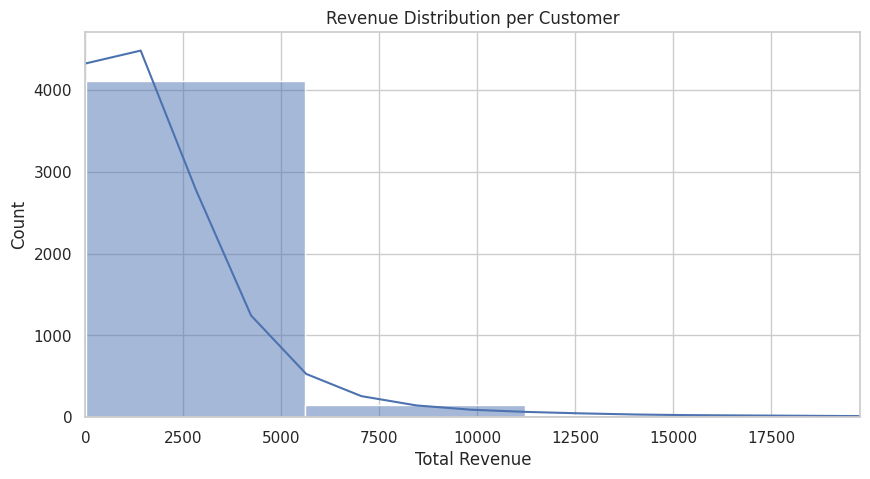

In [25]:
customer_revenue = df_clean.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_revenue, bins=50, kde=True)
plt.title('Revenue Distribution per Customer')
plt.xlabel('Total Revenue')
plt.xlim(0, customer_revenue.quantile(0.99))
plt.show()

1. Why did you pick the specific chart?

A histogram with KDE (Kernel Density Estimate) is used here to analyze the distribution of total revenue per customer. It's ideal to understand how much each customer contributes to overall revenue and identify spending patterns or outliers.



2. What is/are the insight(s) found from the chart?

The distribution is highly right-skewed — meaning:

Most customers spend relatively little.

A few customers contribute very high revenue (these are high-value customers).

This indicates a classic Pareto pattern (80/20 rule) — a small group of customers is likely generating the majority of the revenue.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Identifies top-spending customers, allowing the business to:

Target them with personalized offers, loyalty programs, or VIP services.

Focus marketing and retention efforts on high-value segments.

Helps design tiered customer segmentation (e.g., RFM-based clustering).

3. Multivariate Analysis

Plot 8: Scatter Plot – Unit Price vs Quantity with TotalPrice as Size (Bubble Plot)

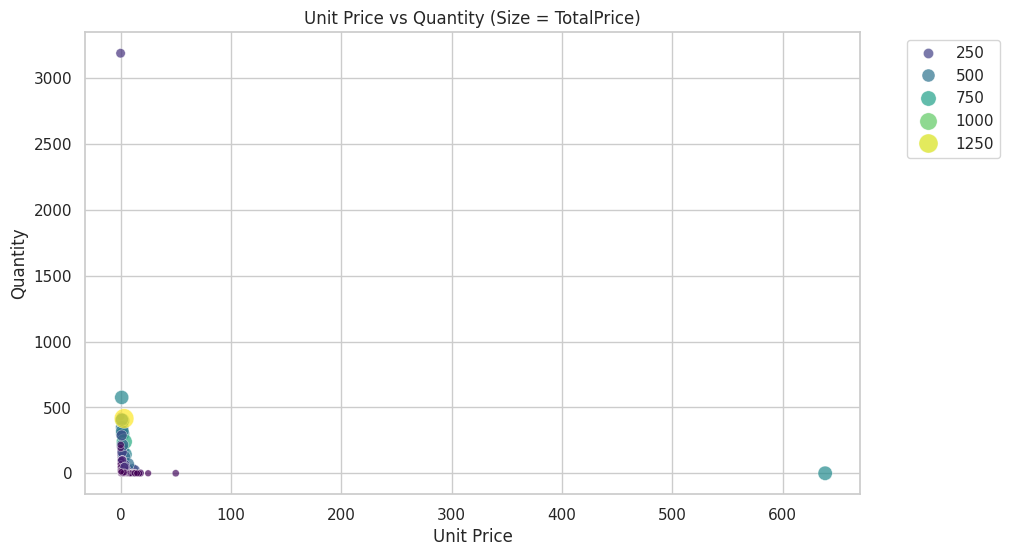

In [26]:
plt.figure(figsize=(10,6))
sample = df_clean.sample(2000, random_state=1)  # reduce size for readability

sns.scatterplot(
    data=sample,
    x='UnitPrice',
    y='Quantity',
    size='TotalPrice',
    hue='TotalPrice',
    palette='viridis',
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('Unit Price vs Quantity (Size = TotalPrice)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1. Why did you pick the specific chart?

A scatter plot with bubble sizes representing TotalPrice is used to explore the relationship between Unit Price and Quantity per transaction. It helps visualize how pricing and purchase volume together impact revenue, making it ideal for multivariate analysis.

2. What is/are the insight(s) found from the chart?

Most transactions occur with:
* Low unit prices and moderate-to-high quantities.

Few high-price products are purchased, and typically in small quantities.

The largest bubbles (highest revenue) are not always from high-priced items, but often from bulk purchases of low-cost items.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify revenue drivers: high revenue may come from bulk sales of low-cost items rather than premium ones.

Supports inventory planning — stock up on fast-moving low-price products.

Encourages designing bundle deals to push higher quantities.

Plot 4: Box Plot – Distribution of TotalPrice across Countries

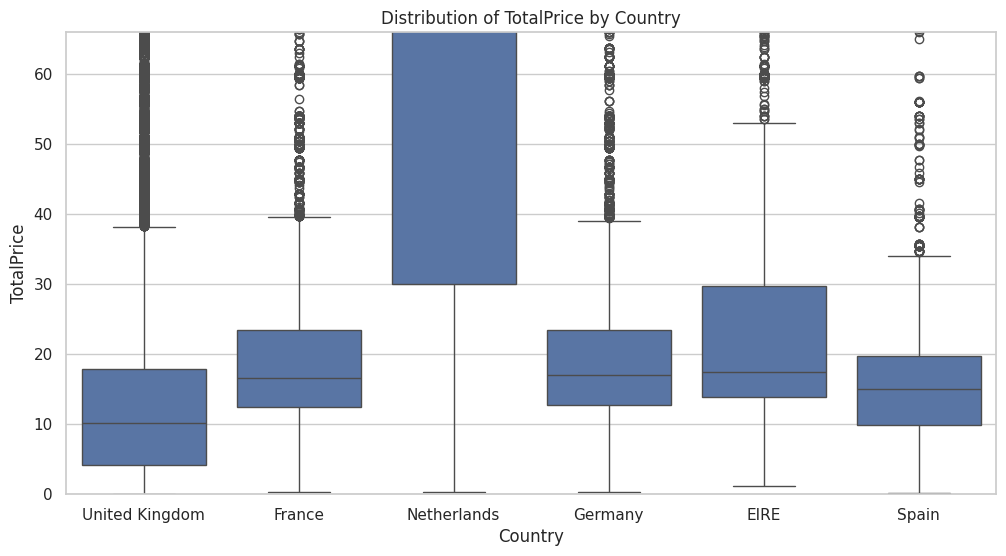

In [27]:
top_countries = df_clean['Country'].value_counts().head(6).index
filtered_df = df_clean[df_clean['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x='Country', y='TotalPrice')
plt.ylim(0, filtered_df['TotalPrice'].quantile(0.95))  # remove outliers
plt.title('Distribution of TotalPrice by Country')
plt.show()


1. Why did you pick the specific chart?

A boxplot is ideal for showing the distribution, median, and spread of total transaction values across countries, while also highlighting outliers. It helps compare customer purchasing behavior in different geographic markets.

2. What is/are the insight(s) found from the chart?

There is variation in median purchase values across top countries.

Some countries have higher median spending per transaction, suggesting better sales opportunities.

The presence of outliers indicates occasional large transactions in every country, especially in the top two.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify high-revenue countries for focused marketing or supply strategies.

Countries with high and consistent spending can be targeted for premium offerings or exclusive deals.

Countries with lower spend but high order volume could benefit from bundled offers or volume discounts.

Plot 3: Heatmap – Average Total Price for Each Country and Month

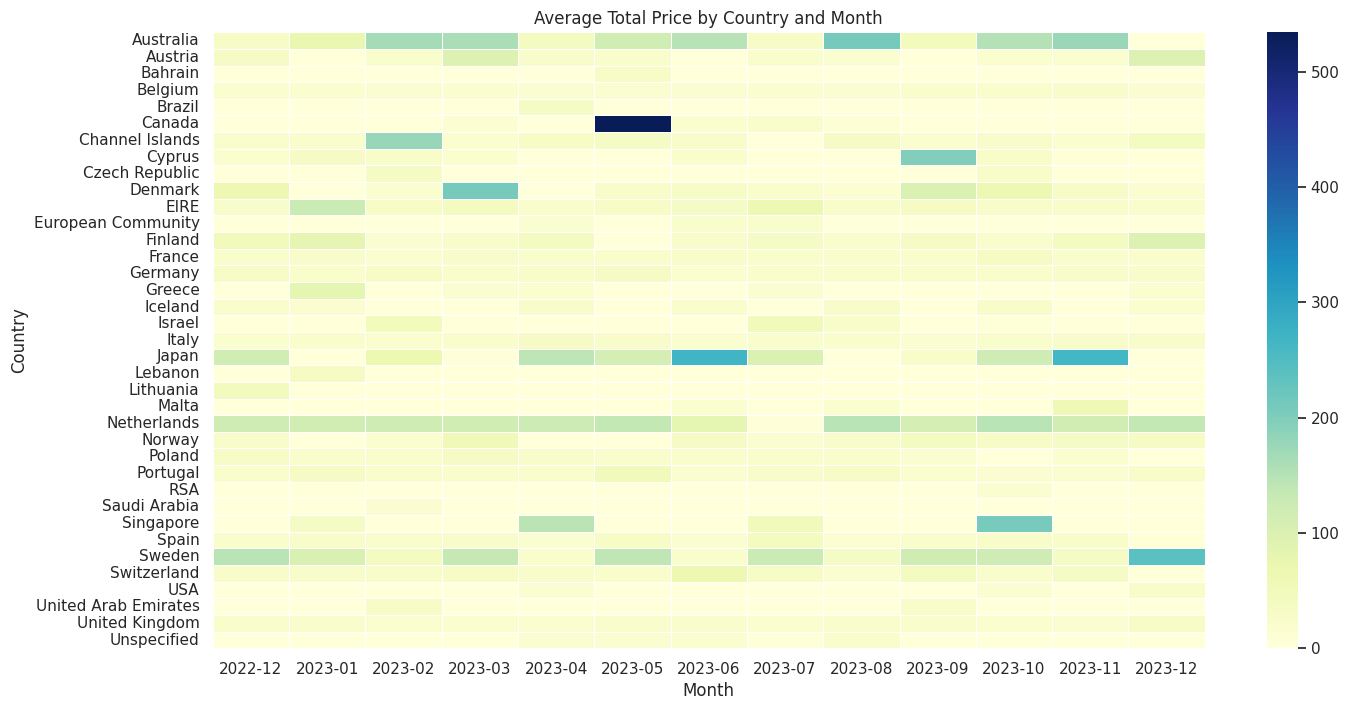

In [28]:
# Convert Month to string for plotting
df_clean['MonthStr'] = df_clean['Month'].astype(str)

# Pivot table
heatmap_data = df_clean.pivot_table(
    index='Country',
    columns='MonthStr',
    values='TotalPrice',
    aggfunc='mean'
).fillna(0)

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Total Price by Country and Month')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()


1. Why did you pick the specific chart?

A heatmap is perfect for showing patterns across two categorical variables — here, Country and Month. It allows quick visual detection of which countries spent more during specific months, using color intensity to represent average total price.

2. What is/are the insight(s) found from the chart?

Some countries show peak spending in specific months (e.g., November).

Others have consistent average spending or seasonal dips.

Countries with darker cells indicate higher average spending — valuable markets.

This reveals seasonal trends and country-wise performance fluctuations.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify strong markets and best-performing time periods for each country.

Enables country-specific marketing campaigns timed to peak months.

Businesses can allocate inventory and budget based on country-season trends.

### Preprocessing (Encoding + Normalization)

In [29]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode Country column (since it's categorical)
le = LabelEncoder()
df_clean['Country_Encoded'] = le.fit_transform(df_clean['Country'])

# Create TotalPrice column (Quantity * UnitPrice)
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Select features for normalization
scaler = MinMaxScaler()
df_clean[['Quantity', 'UnitPrice', 'TotalPrice']] = scaler.fit_transform(
    df_clean[['Quantity', 'UnitPrice', 'TotalPrice']]
)

df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalPrice,MonthStr,Country_Encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.000062,2022-12-01 08:26:00,0.000313,17850.0,United Kingdom,2022-12,0.000091,2022-12,35
1,536365,71053,WHITE METAL LANTERN,0.000062,2022-12-01 08:26:00,0.000416,17850.0,United Kingdom,2022-12,0.000121,2022-12,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.000086,2022-12-01 08:26:00,0.000338,17850.0,United Kingdom,2022-12,0.000131,2022-12,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.000062,2022-12-01 08:26:00,0.000416,17850.0,United Kingdom,2022-12,0.000121,2022-12,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.000062,2022-12-01 08:26:00,0.000416,17850.0,United Kingdom,2022-12,0.000121,2022-12,35


In [30]:
df_clean.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'Month',
 'TotalPrice',
 'MonthStr',
 'Country_Encoded']

### Preprocessing Step -

**Step 1: Import Required Preprocessing Tools**


*   Imports LabelEncoder for converting categorical values into numbers.
*   Imports MinMaxScaler for normalizing numerical data to a specific range.


**Step 2: Encode the Country Column**


*   Creates a new column Country_Encoded, where each country is assigned a unique integer.

**Step 3: Create the TotalPrice Feature**


*   Creates a new column TotalPrice, which is calculated by multiplying Quantity and UnitPrice.

**Step 4: Normalize Numerical Features**


*   Applies Min-Max Scaling to the selected columns: Quantity, UnitPrice, and TotalPrice.















### Feature Engineering (RFM - Recency, Frequency, Monetary)

In [31]:
import datetime as dt

# Reference date for Recency (1 day after last invoice date)
reference_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)

# Create RFM table grouped by CustomerID
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,0.458146
1,12347.0,2,7,0.025582
2,12348.0,75,4,0.010668
3,12349.0,19,1,0.010432
4,12350.0,310,1,0.001985


### Feature Engineering Steps -
**Step 1: Import the datetime Module**

Imports Python’s built-in datetime module using the alias dt.

**Step 2: Define the Reference Date**

* Finds the latest purchase date (InvoiceDate) in the dataset.

* Adds 1 day to it to define a fixed point in time — the "analysis date".

**Step 3: Group Data by CustomerID and Aggregate RFM Metrics**

**RFM Matrics**

**Recency**

It finds the most recent purchase date for each customer (x.max()), and calculates the number of days between that and the reference_date.

**Represents**: How recently the customer made their last purchase.

**Frequency**

It counts the number of unique invoices per customer.

**Represents**: How often the customer made purchases.

**Monetary**

It sums up the total amount spent (TotalPrice) by each customer.

**Represents**: How much money the customer has spent.


**Step 4: Rename Columns**

Renames the automatically generated column names to clearer, business-friendly terms.







### Normalize RFM Values

In [32]:
from sklearn.preprocessing import StandardScaler

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

This step standardizes the RFM features using StandardScaler to ensure all three variables — Recency, Frequency, and Monetary — are on the same scale (mean = 0, standard deviation = 1).
This is essential for clustering algorithms like KMeans, which are sensitive to differences in feature magnitudes.

### Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Univariate Analysis

### Chart - 1

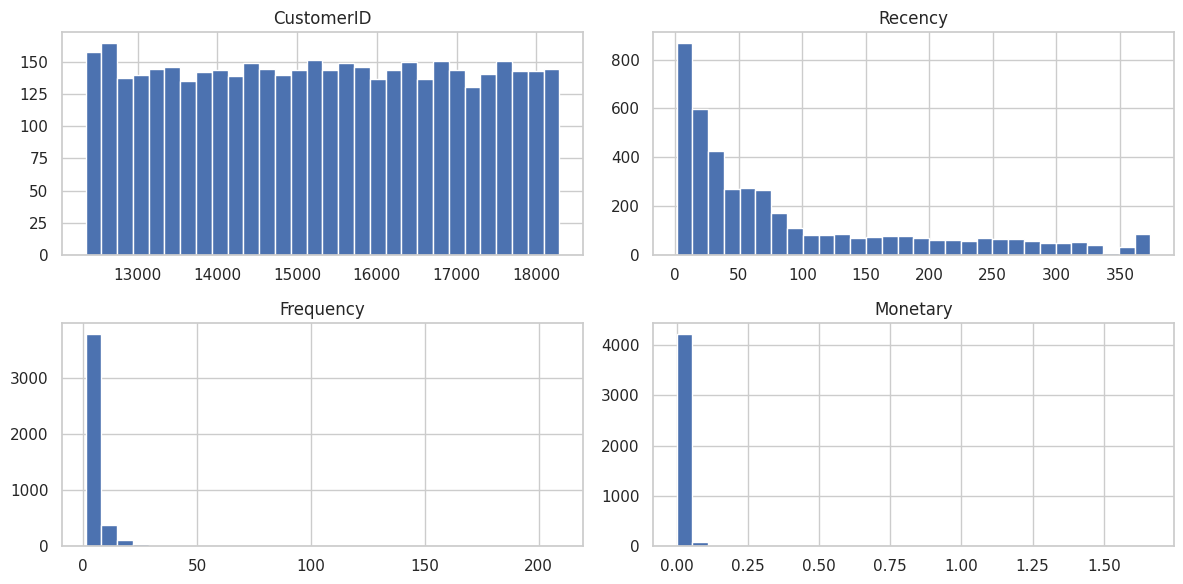

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
rfm.hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

The histogram was chosen because it is the most appropriate chart type for visualizing the distribution of continuous numerical variables such as Recency, Frequency, and Monetary. Specifically:

* It allows us to observe how data is spread across different value ranges.

* Helps identify skewness, outliers, and clustering behavior in the dataset.

* Enables comparison across different RFM metrics to understand customer diversity in behavior.

Given that RFM analysis forms the backbone of customer segmentation in this project, understanding the underlying data distribution is essential before applying any clustering or machine learning techniques.

2. What is/are the insight(s) found from the chart?

From the histograms, we can extract the following detailed insights:

1. Recency

* The majority of customers made their last purchase very recently (i.e., low recency values).

* There is a long tail where fewer customers haven’t purchased in a long time, indicating possible churn or inactivity.

2. Frequency

* A large number of customers made only 1 or 2 purchases, suggesting many customers are one-time or infrequent buyers.

* Very few customers are highly frequent, indicating a small core of loyal/repeat buyers.

3. Monetary

* Spending behavior is highly right-skewed, with most customers spending very little and a few spending significantly more.

* This indicates that revenue is disproportionately driven by a small segment of high-value customers.

4. CustomerID

Distribution across CustomerID appears relatively uniform, confirming that customers are evenly represented numerically and there's no bias in ID assignments.

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. The insights derived from these histograms are highly valuable for driving business strategy:

**Positive Business Impact**

**Retention Focus:**

The high number of recent customers suggests that retention efforts (like loyalty programs) can be more effective if targeted early.

**Identify High-Value Customers:**

The small but impactful group of high-spenders should be nurtured via exclusive offers, early access, or VIP programs.

**Customer Lifecycle Targeting:**

Recency and frequency patterns help design marketing campaigns tailored to reactivate, retain, or upsell to different segments.

**Resource Allocation:**

Helps focus resources (ads, promotions) on high CLV segments rather than one-time buyers who show limited potential.

### Chart - 2

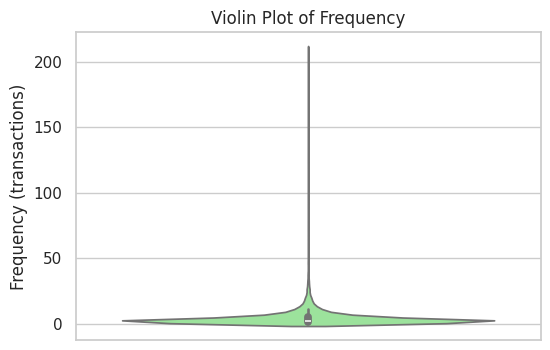

In [34]:
# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(y=rfm['Frequency'], color='lightgreen')
plt.title('Violin Plot of Frequency')
plt.ylabel('Frequency (transactions)')
plt.show()


1. Why did you pick the specific chart?

A violin plot is chosen because it:

Shows both the distribution and density of a numerical variable

Combines a boxplot (summary statistics) with a KDE curve (frequency shape)

Helps visualize skewness, outliers, and customer purchase behavior more clearly than just a boxplot



2. What is/are the insight(s) found from the chart?

Most customers make very few transactions (low frequency)

The data is right-skewed, meaning a small number of customers are very frequent buyers

Outliers are present — customers with much higher transaction counts

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps in customer segmentation — identifying high-value frequent buyers

Assists in building loyalty programs to retain repeat buyers

Supports targeted marketing for frequent and occasional buyers

### Chart - 3

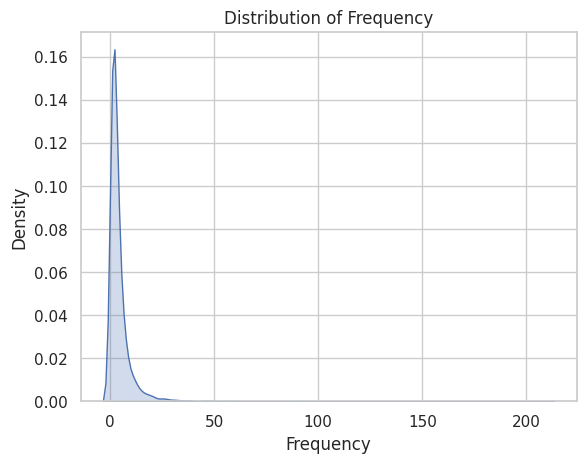

In [35]:
# KDE Plot
sns.kdeplot(rfm['Frequency'], shade=True)
plt.title("Distribution of Frequency")
plt.show()

1. Why did you pick the specific chart?

A KDE plot was chosen because:

It provides a smooth curve to visualize the distribution of a numeric variable

Helps easily understand the shape and spread of customer frequency

More readable and continuous compared to histograms, especially for large datasets

2. What is/are the insight(s) found from the chart?

The frequency is highly concentrated at the lower end, meaning most customers purchase infrequently

The curve is right-skewed, with a long tail — showing few customers make frequent purchases

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Insights support customer segmentation: identify low-frequency vs. high-frequency buyers

Helps design personalized marketing campaigns to boost repeat purchases

### Bivariate Analysis

### Chart - 4

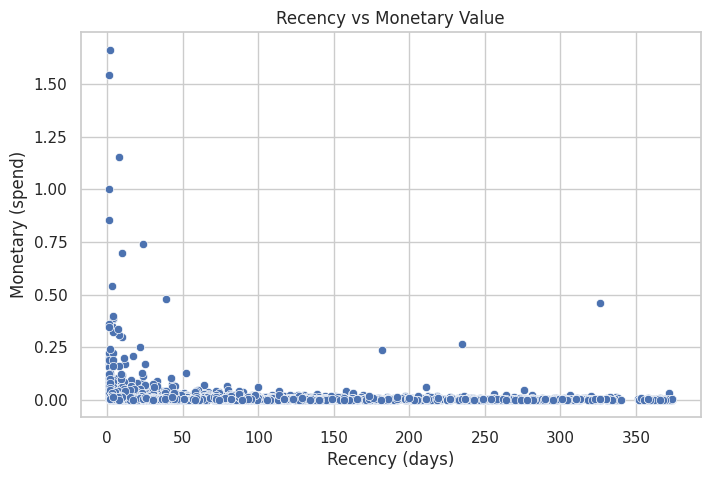

In [36]:
# Scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary')
plt.title('Recency vs Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (spend)')
plt.show()

1. Why did you pick the specific chart?

A scatter plot is ideal for:

Showing the relationship between two continuous variables (Recency & Monetary)

Identifying clusters, outliers, and patterns in customer behavior

Helping visualize how recent purchases relate to how much customers spend

2. What is/are the insight(s) found from the chart?

Most customers who recently purchased (low recency) tend to have higher spending

Customers with high recency (haven’t purchased in a while) mostly have lower spend

A few high-spending outliers exist even among inactive customers

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps target active, high-spending customers for VIP or loyalty programs

Identifies at-risk high spenders for re-engagement campaigns

### Chart - 5

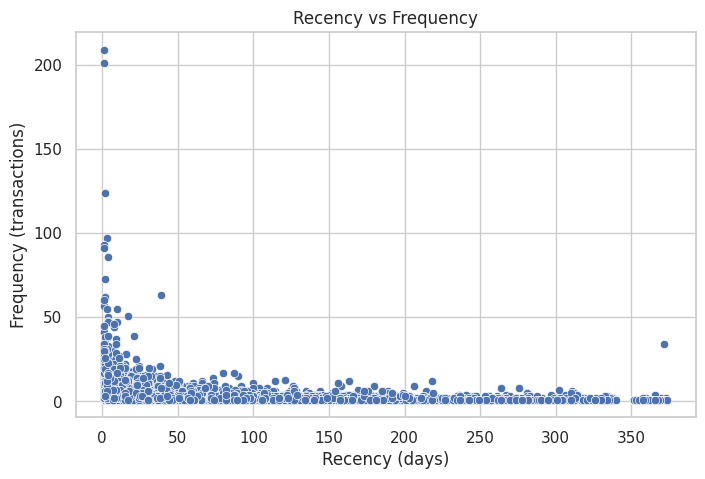

In [37]:
# Scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (transactions)')
plt.show()


1. Why did you pick the specific chart?

A scatter plot is ideal for:

Showing the relationship between Recency and Frequency

Revealing behavior patterns (e.g., do recent customers buy more?)

Detecting clusters, loyal customers, and inactive buyers



2. What is/are the insight(s) found from the chart?

Customers with low recency (recent purchases) usually have higher frequency

Customers with high recency (haven’t bought recently) tend to purchase less often

This shows a negative correlation — as Recency increases, Frequency decreases



3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify loyal and active customers (low recency, high frequency) for reward programs

Supports targeted retention strategies for those whose recency is increasing

### Chart - 6

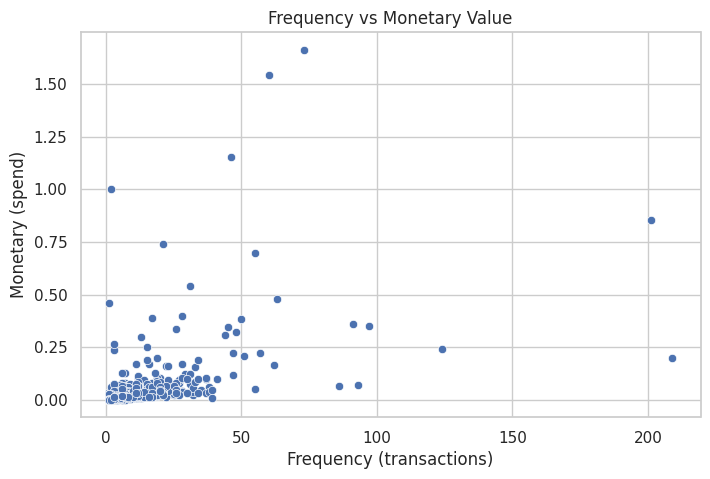

In [38]:
# Scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency (transactions)')
plt.ylabel('Monetary (spend)')
plt.show()

1. Why did you pick the specific chart?

A scatter plot is ideal for:

Displaying the relationship between Frequency and Monetary value

Revealing how often customers buy vs how much they spend

Identifying high-frequency high-spending customers and outliers

2. What is/are the insight(s) found from the chart?

There’s a general positive trend: customers who buy more often also tend to spend more

A few outliers exist who either buy frequently but spend little, or vice versa

Most customers are clustered at the lower left, meaning low spend and low frequency

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps identify valuable customers (high F & high M) for loyalty rewards

Pinpoints frequent but low-spending users who could be upsold or cross-sold

### Multivariate

### Chart - 7

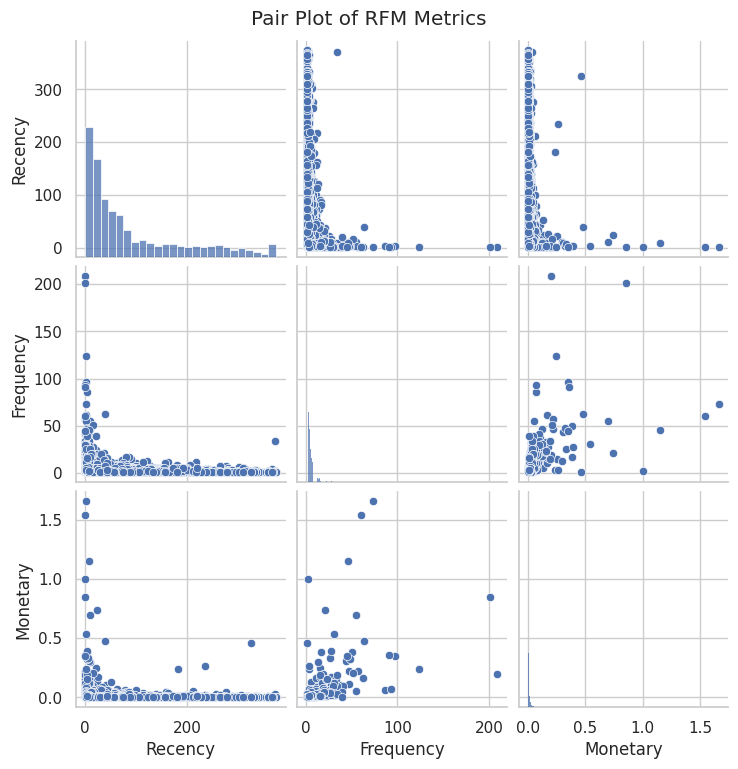

In [39]:
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('Pair Plot of RFM Metrics', y=1.02)
plt.show()

1. Why did you pick the specific chart?

A pair plot is chosen because it:

Shows all pairwise relationships between Recency, Frequency, and Monetary in a single view

Combines scatter plots and histograms to give a full picture of variable interactions

Helps spot correlations, clusters, and data distributions efficiently



2. What is/are the insight(s) found from the chart?

Recency is negatively related to both Frequency and Monetary — recent buyers tend to buy more and spend more

Frequency and Monetary show a positive correlation — frequent buyers usually spend more

All three metrics are highly skewed, with most data points clustered in the lower ranges



3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Validates the logic of RFM: engaged customers buy more and spend more

Helps build effective customer segmentation strategies

Enables better targeting for loyalty or re-engagement campaigns

### Chart - 8

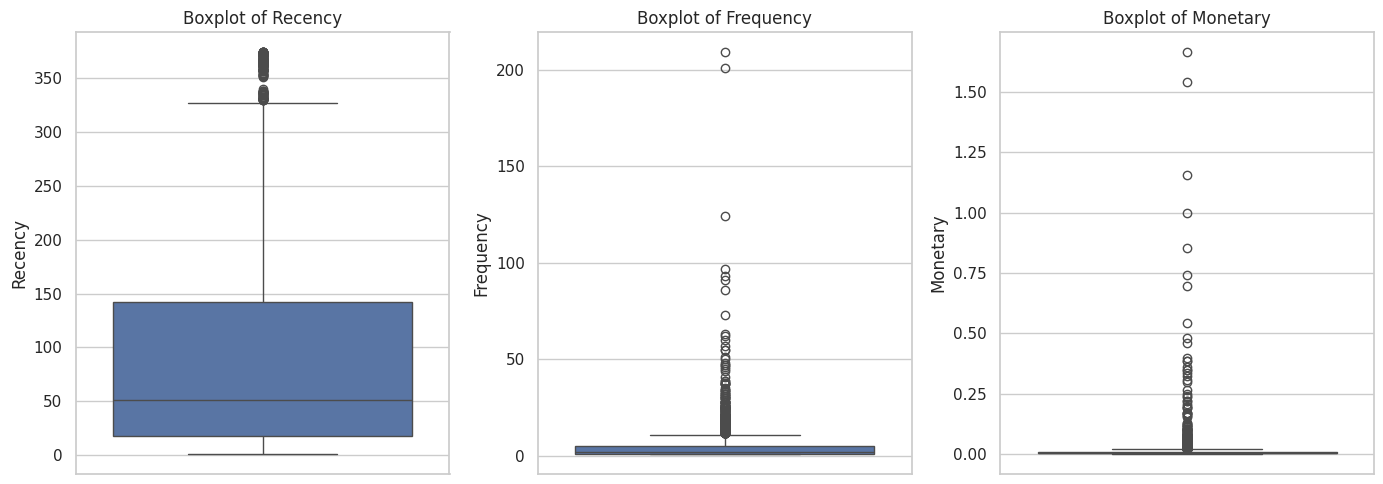

In [40]:
plt.figure(figsize=(14, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A boxplot is ideal for:

Quickly identifying data spread, central tendency (median), and outliers

Summarizing key statistics like minimum, Q1, median, Q3, and maximum

Comparing the distribution of all three RFM metrics side by side

2. What is/are the insight(s) found from the chart?

All three RFM features have many outliers, especially in Frequency and Monetary

The majority of values are concentrated in lower ranges

Recency has fewer extreme values but still shows some high-range outliers

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps you understand which customers are different from the majority (e.g., high-value, high-frequency buyers)

Informs data preprocessing steps like outlier removal or scaling before clustering or modeling

### Chart - 9

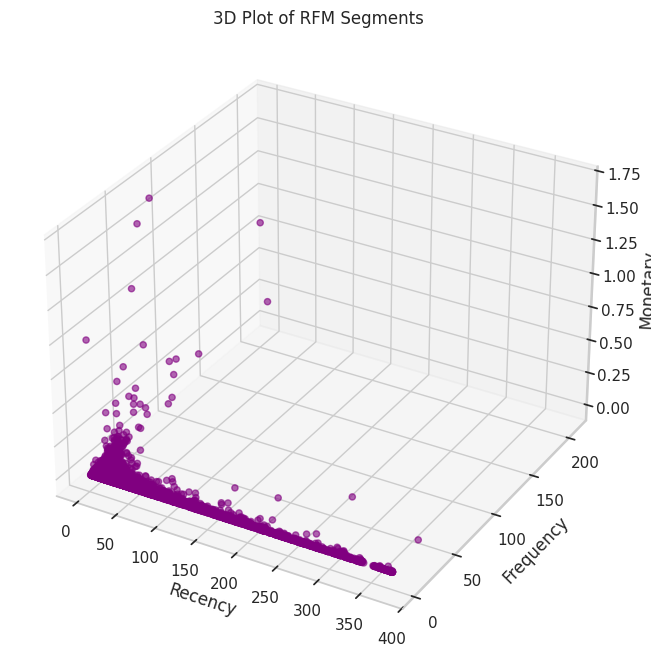

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c='purple', alpha=0.6)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Plot of RFM Segments')
plt.show()

1. Why did you pick the specific chart?

A 3D scatter plot is used because:

It allows visualizing all three RFM metrics together in one plot

Helps identify customer behavior patterns and natural groupings

Gives a better sense of how Recency, Frequency, and Monetary values interact in 3D space

2. What is/are the insight(s) found from the chart?

Most customers cluster around low Frequency and low Monetary values

A few customers stand out with high Frequency and Monetary, indicating high-value segments

The plot reveals natural separation of different customer types, which is useful for clustering

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Supports effective customer segmentation

Helps target high-value customers for retention and reward programs

Visual validation for choosing appropriate clustering models

### Chart - 10

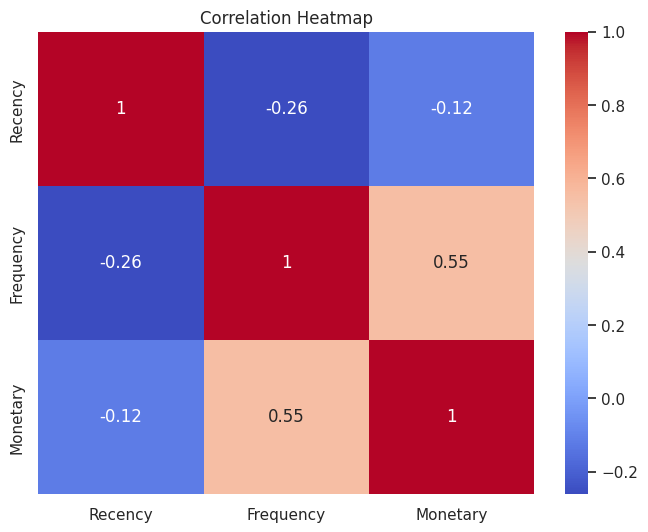

In [42]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

1. Why did you pick the specific chart?

A heatmap is chosen because:

It visually shows the correlation (relationship strength and direction) between numerical features

Helps quickly spot positive or negative linear relationships

The color gradient makes it easy to interpret correlation levels

2. What is/are the insight(s) found from the chart?

Recency has a negative correlation with both Frequency and Monetary → Recent buyers tend to purchase more and spend more

Frequency and Monetary have a strong positive correlation → Customers who buy more often also tend to spend more

3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Confirms the validity of RFM as a customer behavior model

Helps in feature selection and understanding which features influence each other

Useful for building customer segments and predictive models

### Outlier Detection – Z-score filtering

In [43]:
from scipy.stats import zscore

# Compute z-scores
z_scores = rfm[['Recency', 'Frequency', 'Monetary']].apply(zscore)
rfm_no_outliers = rfm[(z_scores < 3).all(axis=1)]

### Dimensionality Reduction using PCA (for RFM)

In [44]:
from sklearn.decomposition import PCA

# Scale data before PCA
scaled_rfm = StandardScaler().fit_transform(rfm_no_outliers[['Recency', 'Frequency', 'Monetary']])

# Apply PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(scaled_rfm)

### Elbow Method to Choose Optimal Clusters

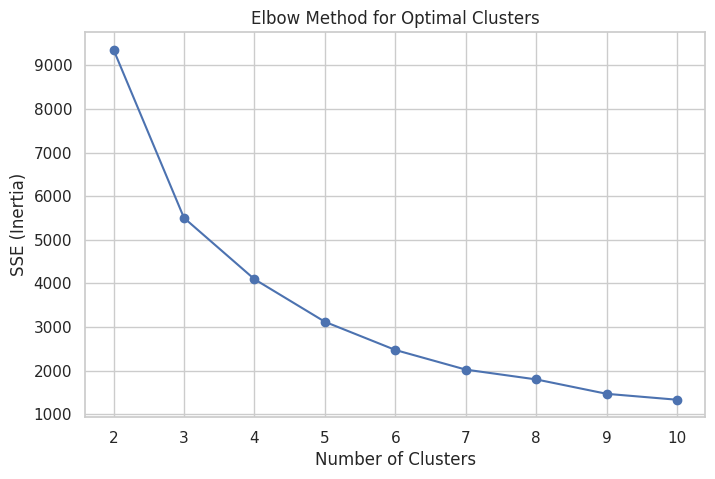

In [45]:
# Use Elbow Method to Choose Optimal Clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    sse.append(model.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


## Apply Clustering Models

### Model 1 - KMeans Clustering

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

# Add labels
rfm['KMeans_Cluster'] = kmeans_labels

# Silhouette score
kmeans_score = silhouette_score(rfm_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")


KMeans Silhouette Score: 0.6162


### Plot KMeans Clusters

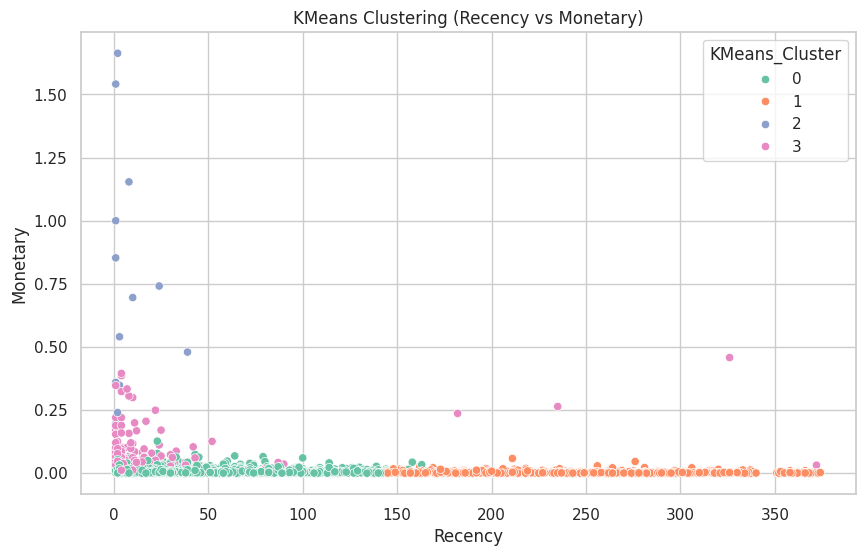

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency', y='Monetary',
    hue='KMeans_Cluster', palette='Set2'
)
plt.title('KMeans Clustering (Recency vs Monetary)')
plt.show()


### DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Run DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_scaled)

# Add labels
rfm['DBSCAN_Cluster'] = dbscan_labels

# Silhouette Score (filter out noise points = -1)
valid_idx = dbscan_labels != -1
if np.unique(dbscan_labels[valid_idx]).size > 1:
    dbscan_score = silhouette_score(rfm_scaled[valid_idx], dbscan_labels[valid_idx])
else:
    dbscan_score = -1  # can't compute with only noise

print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")

DBSCAN Silhouette Score: -1.0000


### Plot DBSCAN Clusters

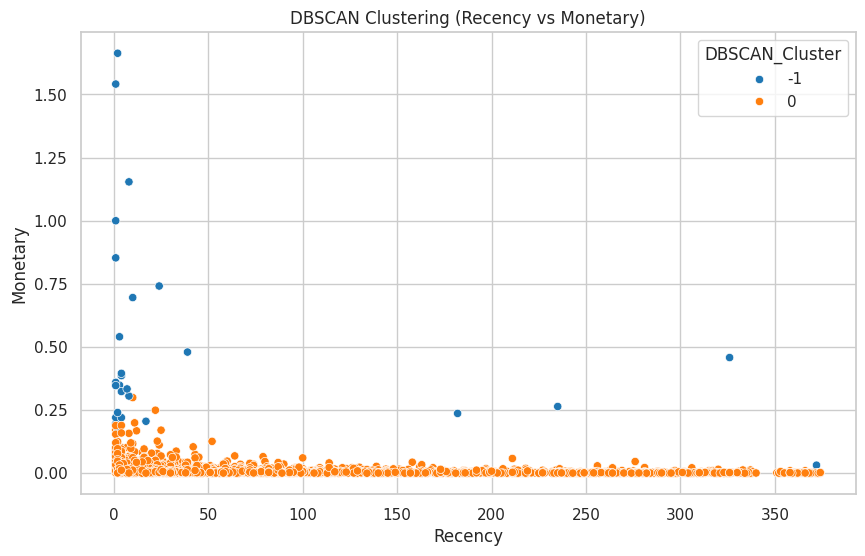

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency', y='Monetary',
    hue='DBSCAN_Cluster', palette='tab10'
)
plt.title('DBSCAN Clustering (Recency vs Monetary)')
plt.show()


### Agglomerative Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(rfm_scaled)

rfm['Agglo_Cluster'] = agglo_labels

agglo_score = silhouette_score(rfm_scaled, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_score:.4f}")


Agglomerative Clustering Silhouette Score: 0.6164


### Plot Agglomerative Clusters

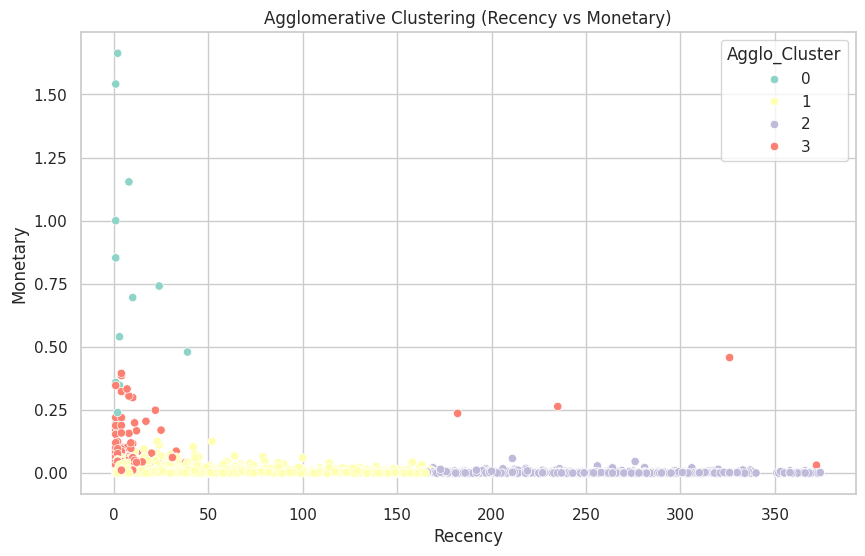

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency', y='Monetary',
    hue='Agglo_Cluster', palette='Set3'
)
plt.title('Agglomerative Clustering (Recency vs Monetary)')
plt.show()


### Model Comparison Table

In [52]:
comparison = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN', 'Agglomerative'],
    'Silhouette Score': [kmeans_score, dbscan_score, agglo_score]
})

print(comparison)

           Model  Silhouette Score
0         KMeans          0.616228
1         DBSCAN         -1.000000
2  Agglomerative          0.616390


### Label the KMeans Clusters

In [53]:
# Profile each KMeans cluster
cluster_profile = rfm.groupby('KMeans_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(cluster_profile)


                Recency  Frequency  Monetary
KMeans_Cluster                              
0                  43.7        3.7       0.0
1                 248.1        1.6       0.0
2                   7.4       82.5       0.8
3                  15.5       22.3       0.1


In [56]:
def label_kmeans(row):
    if row['KMeans_Cluster'] == 0:
        return "Regular"
    elif row['KMeans_Cluster'] == 1:
        return "Occasional"
    elif row['KMeans_Cluster'] == 2:
        return "High-Value"
    else:
        return "At-Risk"

rfm['Segment'] = rfm.apply(label_kmeans, axis=1)

### Visualization - K-Means Cluster Plot

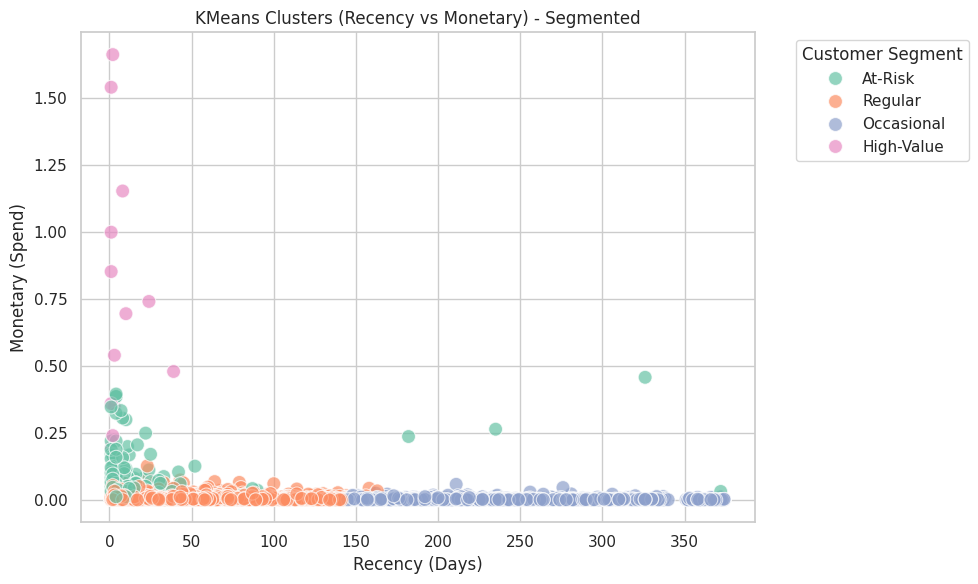

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Segment',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('KMeans Clusters (Recency vs Monetary) - Segmented')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Spend)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Frequency vs Monetary (colored by Segment)

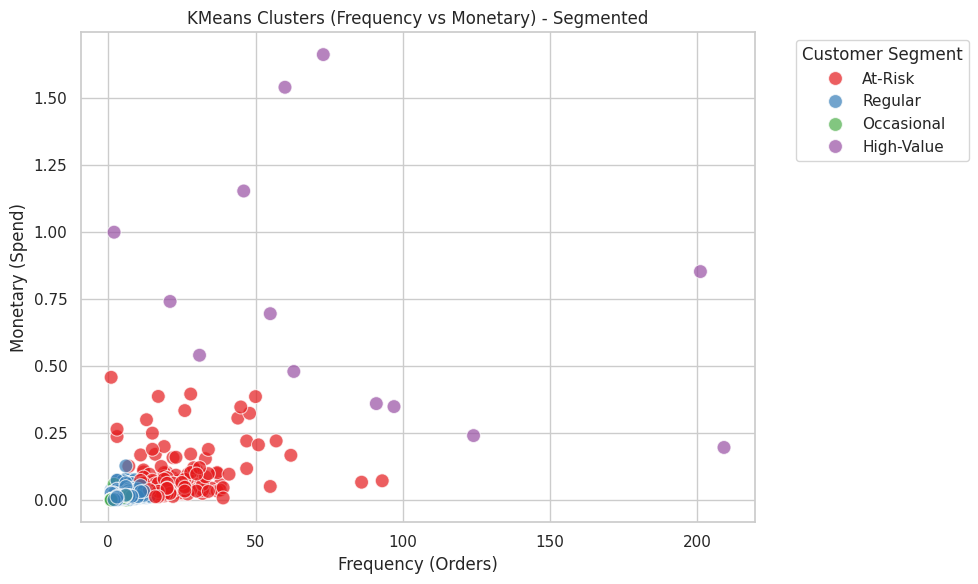

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='Segment',
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('KMeans Clusters (Frequency vs Monetary) - Segmented')
plt.xlabel('Frequency (Orders)')
plt.ylabel('Monetary (Spend)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Visualization - 3D Cluster Visualization

In [59]:
import plotly.express as px

fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment',
    size='Monetary',
    opacity=0.7,
    title='3D Cluster Visualization (RFM Segments)'
)
fig.show()

### Recommedation System

In [60]:
# 1. Create pivot table (CustomerID vs StockCode)
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# 2. Transpose for item-based similarity
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(customer_product_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# 3. Function to recommend top 5 similar products
def recommend_products(stock_code, top_n=5):
    if stock_code not in item_similarity_df:
        return ["Product not found"]
    similar_scores = item_similarity_df[stock_code].sort_values(ascending=False)[1:top_n+1]
    return similar_scores.index.tolist()


### Save the Best Performing Model

In [61]:
import joblib

# Save RFM cluster model
joblib.dump(kmeans, 'rfm_kmeans_model.pkl')
joblib.dump(scaler, 'rfm_scaler.pkl')

# Save item similarity matrix
item_similarity_df.to_pickle("item_similarity.pkl")


In [87]:
from google.colab import files
files.download('rfm_kmeans_model.pkl')
files.download('rfm_scaler.pkl')
files.download('item_similarity.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Build Streamlit App (app.py)

In [86]:
!pip install streamlit

In [87]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import gdown
import os

st.title("🛒 Shopper Spectrum - Customer Insights & Recommendations")

# Step 1: Load item_similarity.pkl from Google Drive
item_file = "item_similarity.pkl"

if not os.path.exists(item_file):
  # Replace with your actual Google Drive sharable link (file > share > anyone with link)
    url = 'https://drive.google.com/file/d/1u8ZsGFasaSnSUiXNIZ_vum7P-rIoy6lV/view?usp=sharing'  # <-- replace YOUR_FILE_ID
    gdown.download(url, item_file, quiet=False)

# Step 2: Load Models
kmeans = joblib.load("rfm_kmeans_model.pkl")
scaler = joblib.load("rfm_scaler.pkl")
item_similarity = pd.read_pickle(item_file)

# Step 3: Interface Tabs
tab1, tab2 = st.tabs(["Product Recommender", "Customer Segment Predictor"])

# Product Recommendation Tab
with tab1:
    st.header("Product Recommendation System")
    product_code = st.text_input("Enter Product Stock Code (e.g., 85123A)")

    if st.button("Get Recommendations"):
        if product_code in item_similarity.columns:
            similar = item_similarity[product_code].sort_values(ascending=False)[1:6]
            st.write("Top 5 similar products:")
            for item in similar.index:
                st.markdown(f"- {item}")
        else:
            st.warning("Product not found!")

# Customer Segmentation Tab
with tab2:
    st.header("Customer Segmentation")

    rec = st.number_input("Recency (in days)", min_value=0)
    freq = st.number_input("Frequency (number of purchases)", min_value=0)
    mon = st.number_input("Monetary (total amount spent)", min_value=0.0)

    if st.button("Predict Segment"):
        user_data = scaler.transform([[rec, freq, mon]])
        cluster = kmeans.predict(user_data)[0]

        # Basic logic (you can enhance this based on your data analysis)
        if cluster == 0:
            segment = "High-Value Customer"
        elif cluster == 1:
            segment = "Regular Customer"
        elif cluster == 2:
            segment = "At-Risk Customer"
        else:
            segment = "Occasional Buyer"

        st.success(f" Predicted Segment: {segment}")

Overwriting app.py


In [85]:
!cat app.py

import streamlit as st
import pandas as pd
import joblib
import gdown
import os

st.title("🛒 Shopper Spectrum - Customer Insights & Recommendations")

# Step 1: Load item_similarity.pkl from Google Drive
item_file = "item_similarity.pkl"

if not os.path.exists(item_file):
  # Replace with your actual Google Drive sharable link (file > share > anyone with link)
    url = 'https://drive.google.com/file/d/1u8ZsGFasaSnSUiXNIZ_vum7P-rIoy6lV/view?usp=sharing'  # <-- replace YOUR_FILE_ID
    gdown.download(url, item_file, quiet=False)

# Step 2: Load Models
kmeans = joblib.load("rfm_kmeans_model.pkl")
scaler = joblib.load("rfm_scaler.pkl")
item_similarity = pd.read_pickle(item_file)

# Step 3: Interface Tabs
tab1, tab2 = st.tabs(["Product Recommender", "Customer Segment Predictor"])

# Product Recommendation Tab
with tab1:
    st.header("Product Recommendation System")
    product_code = st.text_input("Enter Product Stock Code (e.g., 85123A)")

    if st.button("Get Recommendations"):
       

In [83]:
import streamlit as st
import pandas as pd
import joblib
import gdown
import os

st.title("🛒 Shopper Spectrum - Customer Insights & Recommendations")

# Step 1: Load item_similarity.pkl from Google Drive
item_file = "item_similarity.pkl"

if not os.path.exists(item_file):
  # Replace with your actual Google Drive sharable link (file > share > anyone with link)
    url = 'https://drive.google.com/file/d/1u8ZsGFasaSnSUiXNIZ_vum7P-rIoy6lV/view?usp=sharing'  # <-- replace YOUR_FILE_ID
    gdown.download(url, item_file, quiet=False)

# Step 2: Load Models
kmeans = joblib.load("rfm_kmeans_model.pkl")
scaler = joblib.load("rfm_scaler.pkl")
item_similarity = pd.read_pickle(item_file)

# Step 3: Interface Tabs
tab1, tab2 = st.tabs(["Product Recommender", "Customer Segment Predictor"])

# Product Recommendation Tab
with tab1:
    st.header("Product Recommendation System")
    product_code = st.text_input("Enter Product Stock Code (e.g., 85123A)")

    if st.button("Get Recommendations"):
        if product_code in item_similarity.columns:
            similar = item_similarity[product_code].sort_values(ascending=False)[1:6]
            st.write("Top 5 similar products:")
            for item in similar.index:
                st.markdown(f"- {item}")
        else:
            st.warning("Product not found!")

# Customer Segmentation Tab
with tab2:
    st.header("Customer Segmentation")

    rec = st.number_input("Recency (in days)", min_value=0)
    freq = st.number_input("Frequency (number of purchases)", min_value=0)
    mon = st.number_input("Monetary (total amount spent)", min_value=0.0)

    if st.button("Predict Segment"):
        user_data = scaler.transform([[rec, freq, mon]])
        cluster = kmeans.predict(user_data)[0]

        # Basic logic (you can enhance this based on your data analysis)
        if cluster == 0:
            segment = "High-Value Customer"
        elif cluster == 1:
            segment = "Regular Customer"
        elif cluster == 2:
            segment = "At-Risk Customer"
        else:
            segment = "Occasional Buyer"

        st.success(f" Predicted Segment: {segment}")


2025-07-30 12:23:15.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 12:23:15.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar